In [1]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import statistics
import scipy.io
import h5py
import sys
PlottingFormat_Folder = '/home/sheffieldlab/Desktop/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from Rastermap import PlotRaster as r

In [3]:
SaveFigureFolder = '/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure2/'

## Experimental Animal

### CFC4

In [4]:
ExpDirectoryName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'

In [5]:
exptaskframes = {'Task1': [2430, -120],
             'Task2': [0, -3960],
             'Task3': [0, -2510], 
                'Task4': [0, -2510]}
exptaskstoplot = ['Task1', 'Task2', 'Task3']
remove_laps = {'Task1':0, 'Task2':1, 'Task3':0, 'Task4':0}

#### Rastor Plot

In [6]:
d_exp = r(AnimalName='CFC4', FolderName=ExpDirectoryName,
          SaveFigureFolder=SaveFigureFolder, taskstoplot=exptaskstoplot)
Exp_Fdata, Exp_Cdata, Exp_R2data = d_exp.combinedata_correct_forraster(
    exptaskframes, remove_laps)

Loading Data
F (1924, 65000)
Fc (1924, 65000)
Fc3 (1924, 65000)
['Task1', 'Task2', 'Task3']
['Task1', 'Task2', 'Task3']
['Task1', 'Task2', 'Task3']


### Plot distribution of cell transients for sorting

In [7]:
activecells = np.load(os.path.join(ExpDirectoryName, 'CFC4', 'activecells.npy'))
Exp_Fdata, Exp_Cdata = Exp_Fdata[activecells, :], Exp_Cdata[activecells, :]

In [8]:
d_exp.make_rastermap(Exp_Fdata, Exp_Cdata, ncomp=1)

nmin 200
0.02527165412902832
0.9605729579925537
1.091179370880127
1.0944621562957764
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.25s     0        0.0370      2
0.27s    10        0.1211      4
0.29s    20        0.1781      8
0.30s    30        0.2655      18
0.32s    40        0.3178      28
0.34s    50        0.3183      28
0.36s   final      0.3184
0.36s upsampled    0.3184
(1012, 12772)


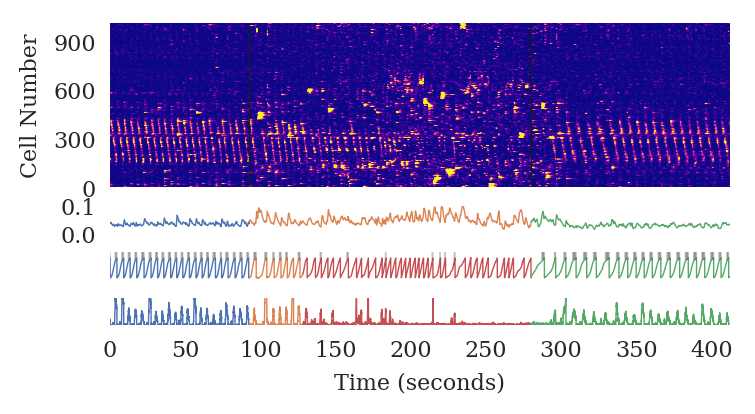

In [9]:
fs, ax = plt.subplots(4, sharex='all', dpi=200, gridspec_kw={
                      'height_ratios': [3, 0.5, 0.5, 0.5], 'hspace': 0.3})
d_exp.plot_rastermap(
    fs, ax, fdata=Exp_Fdata, crop_cellflag=0, ylim_meandff=0.1)
d_exp.plot_samplecells([316], axis=ax[3])
fs.set_size_inches((4, 2))

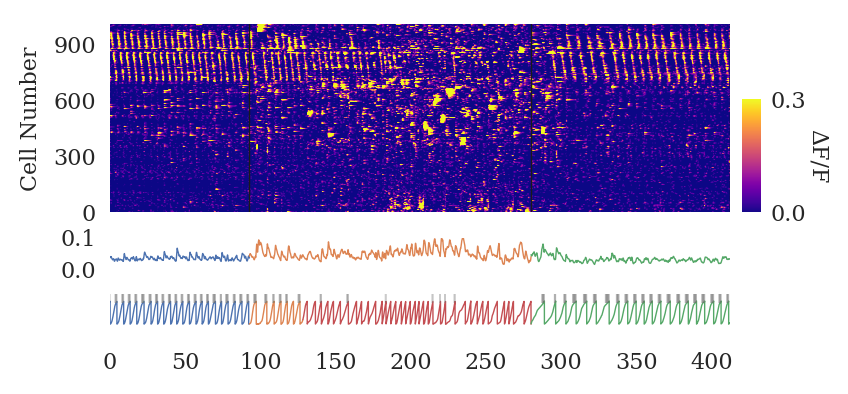

In [10]:
cells_to_use=[[550, 1012], [400, 550], [0, 400]]
croppedSm = d_exp.crop_Sm_and_sort(cells_to_use=cells_to_use, compileflag=0)
fs, ax = plt.subplots(3, sharex='all', dpi=200, gridspec_kw={
                      'height_ratios': [3, 0.5, 0.5], 'hspace': 0.3})
d_exp.plot_rastermap(
    fs, ax, fdata=Exp_Fdata, crop_cellflag=1, ylim_meandff=0.1, crpdSm=croppedSm)
fs.set_size_inches((4, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'RasterMap_CFC4_Allcells_withmeandff.pdf'),
#            bbox_inches='tight', transparent=True)

## Novel

In [11]:
exptaskframes = {'Task4': [150, -3800]}
exptaskstoplot = ['Task4']
remove_laps = {'Task4':0}

In [12]:
d_nov = r(AnimalName='CFC4', FolderName=ExpDirectoryName,
          SaveFigureFolder=SaveFigureFolder, taskstoplot=exptaskstoplot)
Nov_Fdata, Nov_Cdata, Nov_R2data = d_nov.combinedata_correct_forraster(
    exptaskframes, remove_laps)

Loading Data
F (1924, 65000)
Fc (1924, 65000)
Fc3 (1924, 65000)
['Task4']


In [13]:
activecells = np.load(os.path.join(ExpDirectoryName, 'CFC4', 'activecells.npy'))
Nov_Fdata, Nov_Cdata = Nov_Fdata[activecells, :], Nov_Cdata[activecells, :]

In [14]:
d_nov.make_rastermap(Nov_Fdata, Nov_Cdata, ncomp=1)

nmin 200
0.010781288146972656
0.3297421932220459
0.3474242687225342
0.3496701717376709
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0380      2
0.02s    10        0.1312      4
0.04s    20        0.2114      8
0.06s    30        0.3258      18
0.07s    40        0.3973      28
0.09s    50        0.4031      28
0.11s   final      0.4031
0.11s upsampled    0.4031
(1012, 4706)


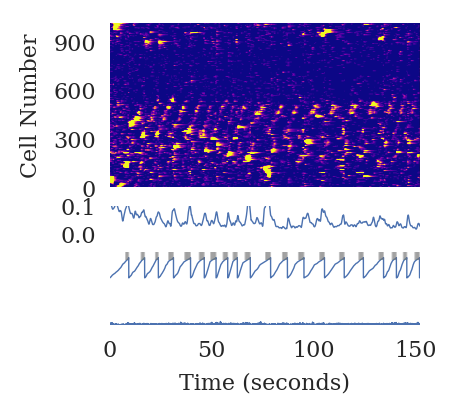

In [15]:
fs, ax = plt.subplots(4, sharex='all', dpi=200, gridspec_kw={
                      'height_ratios': [3, 0.5, 0.5, 0.5], 'hspace': 0.3})
d_nov.plot_rastermap(
    fs, ax, fdata=Nov_Fdata, crop_cellflag=0, ylim_meandff=0.1)
d_nov.plot_samplecells([316], axis=ax[3])
fs.set_size_inches((2, 2))

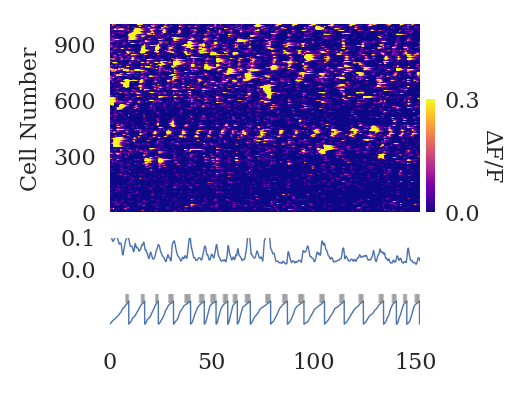

In [16]:
cells_to_use=[[550, 1012], [400, 550], [0, 400]]
croppedSm = d_nov.crop_Sm_and_sort(cells_to_use=cells_to_use, compileflag=0)
fs, ax = plt.subplots(3, sharex='all', dpi=200, gridspec_kw={
                      'height_ratios': [3, 0.5, 0.5], 'hspace': 0.3})
d_nov.plot_rastermap(
    fs, ax, fdata=Nov_Fdata, crop_cellflag=1, ylim_meandff=0.1, crpdSm=croppedSm)
fs.set_size_inches((2, 2))

In [17]:
compiled_fdata = np.hstack((Exp_Fdata, Nov_Fdata))
compiled_taskstoplot = ['Task1', 'Task2', 'Task3', 'Task4']
compiled_data = np.hstack((d_exp.Sm, d_nov.Sm))
croppedSm = d_nov.crop_Sm_and_sort(cells_to_use=cells_to_use, compileflag=1, Sm=compiled_data)
running_data = d_exp.good_running_data
running_data['Task4'] = d_nov.good_running_data['Task4']
lick_data = d_exp.lick_data
lick_data['Task4'] = d_nov.lick_data['Task4']

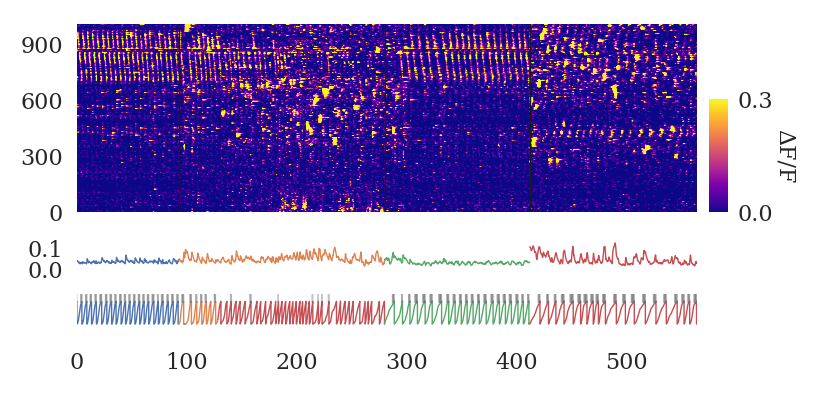

In [18]:
fs, ax = plt.subplots(3, sharex='all', dpi=200, gridspec_kw={
                      'height_ratios': [3, 0.5, 0.5], 'hspace': 0.3})
d_nov.compiled_rastermap(fs, ax, taskstoplot=compiled_taskstoplot,
                         compiled_fdata=compiled_fdata, compiled_Smdata=croppedSm, 
                         compiled_runningdata=running_data, compiled_lickdata=lick_data)
fs.set_size_inches((4, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'RasterMap_CFC4_Allcells_withmeandff_withTask4.pdf'),
           bbox_inches='tight', transparent=True)